<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo1_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3

#Importar Bibliotecas

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Carregar informações

In [318]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ",", decimal = ".")

#Tratar Dados

In [319]:
pd.options.display.float_format = "{:.2f}".format


#Desafio 01 - Escolher uma palete de cores mais adequada do matplotlib.




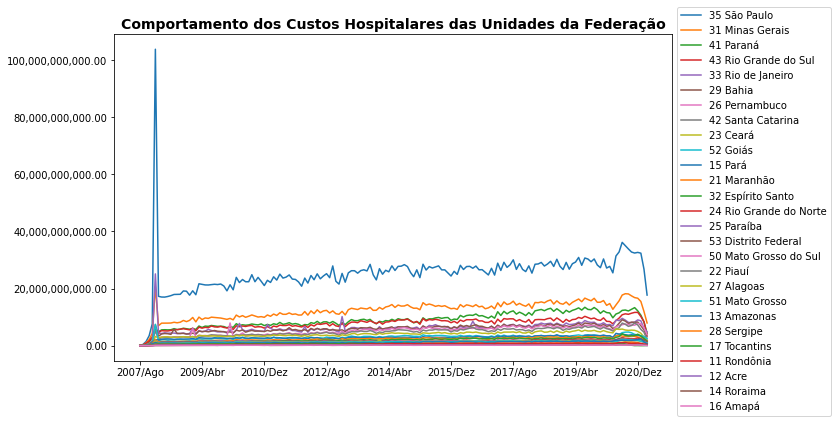

In [320]:
font = {'weight' : 'bold',
        'size'   : 14,
        'Color' : 'black'}
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]

usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.nlargest(27, "Total")
usaveis= usaveis.drop("Total", axis=1)

ax = usaveis.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1.1))
plt.title("Comportamento dos Custos Hospitalares das Unidades da Federação", fontdict=font)
sns.set_palette(sns.color_palette("gist_rainbow", 27))

#Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [321]:

regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
estados = usaveis.index
usaveis["Regioes"] = list(map(lambda estado: regioes[estado[0]] , estados))

In [322]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,166534990,443416864,1457739584,3503225998,7666854741,103806742315,17296199958,17055669616,17033816323,17246205787,17549299585,17956991006,18000505015,18015165617,19185988440,19092726619,17709392351,19241205908,17864128475,21701173099,21512810789,21290521748,21271545571,21407935756,21526562554,21424987152,21611714569,20918397187,19215703774,21351279372,19578792641,23941137283,22120292985,23192277754,22404380874,22415773003,24876185509,22412103886,23935418552,22563905393,...,27965170180,25421907183,28534736795,28637190891,29167908716,27910217509,28615121615,29566908246,27768559312,30276655112,27826841972,26677032119,29189365529,26808352599,28715499464,29287054404,30914091540,28162176701,30719511845,30358411400,29408406768,30386635588,28279183307,27335749141,30386592727,27205069890,27793867453,25517874112,31427626303,32829358102,36198689625,35026867125,33887247849,32805582263,32459977340,32684622895,32411542570,26819306406,17740831771,Sudeste
31 Minas Gerais,97139437,286178150,1001801135,2173028163,4342951754,20620808090,7030108950,7911900551,7904632241,7926807012,7961918920,8220920698,8037411708,8240912930,8861347660,8448699611,8892863030,9901815584,8367511983,10025861686,9183132537,9728970307,9572339653,10005000870,9897718426,9820211908,9696239427,9476763913,9241277073,9580655642,9076489028,10738985003,10083595345,10549455031,9966611596,10336535752,10784425969,10434113819,10052540388,10194362550,...,14651060058,13073403129,15150678186,15070257227,15360488055,15026249913,15672191231,16048491869,14599861106,15729458662,14817278399,14542240628,15323642257,14269077252,15197619681,15795786620,16364109476,15417415349,16677591385,16177465877,15743783394,16616512518,15217150307,15247328115,15826577755,14146336042,14765494270,12744729037,14274628734,15727661650,17746663810,18217612299,18142250043,17458563828,16856470816,16637696767,15506448325,11987741715,7978083800,Sudeste
41 Paraná,55480022,143170801,463040244,1112003079,2879072287,5808133445,4885504646,5561179107,5611513582,5557483193,5609475474,5980240207,5669900113,5809198579,6136594122,5966720862,5781619774,6038159399,5723910163,6907048820,6405467826,6868554295,6793122706,7095876264,6922578396,6784996852,6855820928,6715849697,6309427428,6690264363,6450113364,7713887060,7075539699,7345675671,7183902089,7301383077,7615100695,7424096345,7304238670,7636475027,...,11613319349,10707598224,12233135451,12473134517,12708309002,12261692402,12799190080,13125716340,12064737743,12953016396,12181066926,11298463073,12415923968,11771547332,12390737222,12746450239,13260803980,12486587314,13470865918,12717438195,12620397657,13387060168,12622114081,11357383272,12233010196,11612574039,11477657127,9778406057,11101277038,11520371664,12385664055,12508946862,12177116711,12750608652,13344330736,12214625692,10694889753,8313017537,4348072907,Sul
43 Rio Grande do Sul,104925233,318291314,857131211,1659243280,3013425570,5106461003,4589770482,5292869592,5197241677,5167935079,5375967401,5639164777,5623375874,5791017098,5959212491,5756574208,5569692094,6152238002,5210163777,6511196549,6159082891,6440229162,6309064055,6913700488,6606262979,6522201132,6756940919,6418911530,6224428280,65488387

#Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

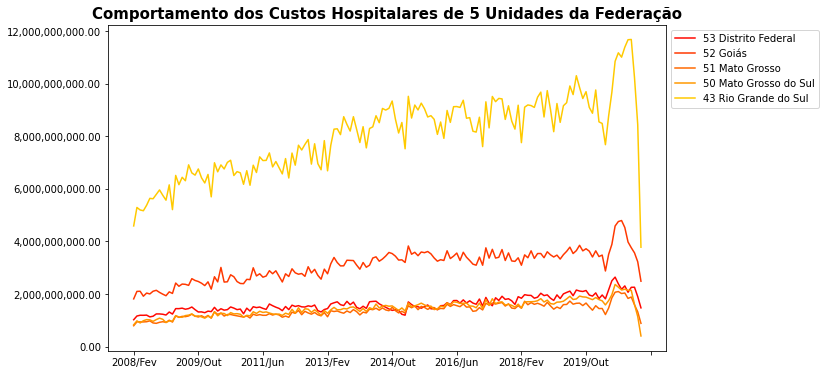

In [323]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

usaveis = dados[colunas_usaveis]
usaveis= usaveis.drop("Total", axis=1)
usaveis = usaveis.set_index("Unidade da Federação")
usaveis_ordenado = usaveis.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.index.tolist()[:5]
usaveis_ordenado = usaveis_ordenado.loc[coluna_cinco_estados]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]] 

ax = usaveis_ordenado.T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1,1))
sns.set_palette(sns.color_palette("tab10", 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Comportamento dos Custos Hospitalares de 5 Unidades da Federação", fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

#Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

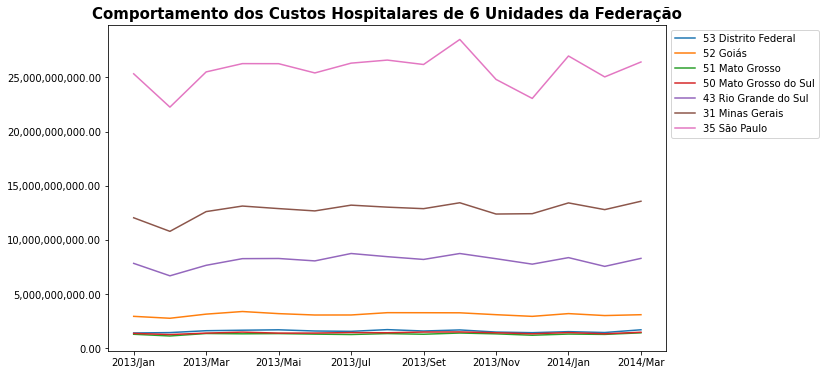

In [324]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis= usaveis.drop("Total", axis=1)
usaveis = usaveis.set_index("Unidade da Federação")
usaveis_ordenado = usaveis.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.index.tolist()[:5]
coluna_cinco_estados.append("31 Minas Gerais")
coluna_cinco_estados.append("35 São Paulo")

usaveis_ordenado = usaveis_ordenado.loc[coluna_cinco_estados]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[65:80]] 
ax = usaveis_ordenado.T.plot(figsize=(10,6))
sns.set_palette(sns.color_palette("Paired", 27))
plt.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Comportamento dos Custos Hospitalares de 6 Unidades da Federação", fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

#Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

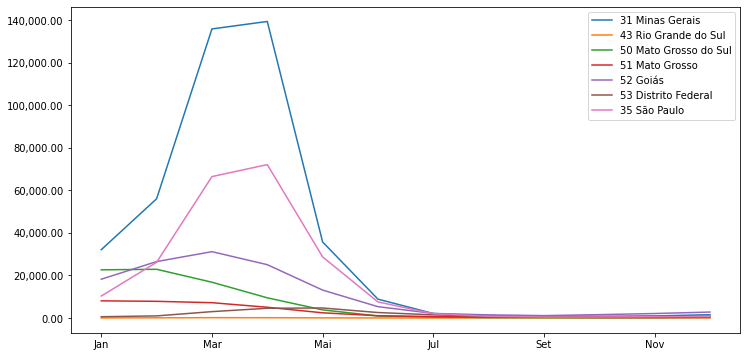

In [326]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A124715189_28_143_208.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 17, engine = "python", thousands = ",", decimal = ".")

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"UF de notificação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.drop("Total",axis=1)

usaveis.set_index("UF de notificação",inplace=True)

selecionados = ["31 Minas Gerais", "43 Rio Grande do Sul", 
                "50 Mato Grosso do Sul", "51 Mato Grosso",
                "52 Goiás", "53 Distrito Federal", "35 São Paulo"]
usaveis = usaveis.loc[selecionados]

ax = usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1,1))

sns.set_palette(sns.color_palette("tab10", 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))


Acima vemos os dados referente as notificações de Dengue. percebe-se que em março há um grande pico de casos notificados. Porém de abril a maio, as notificações de caso de Dengue caem, há uma leve relação entre os dois gráficos neste período, mas em outubro vemos outro pico que não é por casos de dengue. 